**Setup**

앞 장에서 신경망 학습에 대한 코드를 구현했다.

이 때, 신경망의 가중치 매개변수의 기울기(정확히는 손실 함수의 기울기)는 수치 미분을 사용했다.
- 단순하고 구현하기도 쉽지만 시간이 오래 걸린다는 단점이 있음 
> 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법(Backpropagation)에 대해 정리


**출처**

https://fliphtml5.com/qvagj/edfm/basic

# 계산 그래프

**계산 그래프**는 계산 과정을 그래프로 나타낸 것이다. 
- 복수의 노드와 엣지(노드와 노드 사이의 직선)로 표현

## 계산 그래프 예제

### 예제 1
- 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이 때 지불 금액을 구하세요. 단 소비세가 10% 부과됩니다.

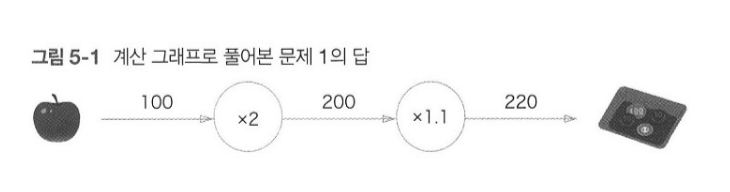

- 처음에 사과의 100원이 '$\times2$' 노드로 흐르고, 200원이 되어 다음 노드로 전달
- 200원이 '$\times1.1$' 노드를 거쳐 220원이 된다.
> 220원 출력

'$\times2$', '$\times1.1$' 자체를 하나의 연산으로 생각할 수도 있지만, '$\times$' 만을 하나의 연산이라고 가정했을 때는 사과의 개수와 소비세가 변수가 되어 원 밖에 표기

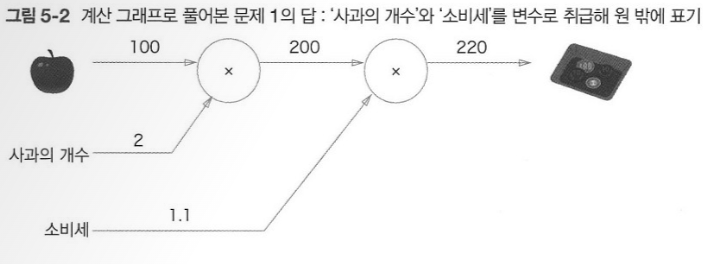

### 예제 2
- 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요.

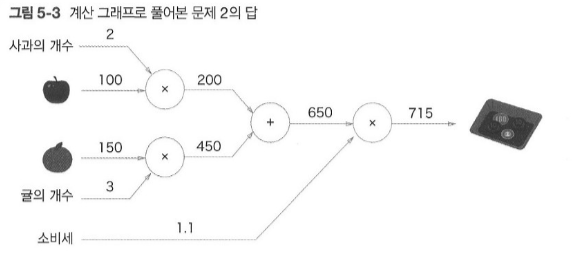

덧셈 노드인 '$+$'가 새로 등장하여 사과와 귤의 금액을 합산한다. 

### 요약
계산 그래프를 활용한 문제 풀이는 다음의 흐름으로 진행 
- 1. 계산 그래프를 구성
- 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행

계산을 왼쪽에서 오른쪽으로 진행하는 단계를 **순전파**라고 한다. 
> 이것의 반대 과정을 역전파라고 한다. 이후에 미분을 계산할 때 중요한 역할을 한다.

## 국소적 계산

계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점에 있다.

국소적 계산은 결국 전체에서 어떤 일이 벌어지든 관계없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 의미

ex. 여러 식품을 구입하는 복잡한 계산을 거쳐 4,000원이라는 총 금액을 얻었고, 이 과정이 어떻게 진행되었는지는 상관없이 사과 2개의 가격인 200원을 더하기만 하면 된다.
> 즉, 사과 노드는 앞의 복잡한 계산은 신경쓸 필요가 없음 

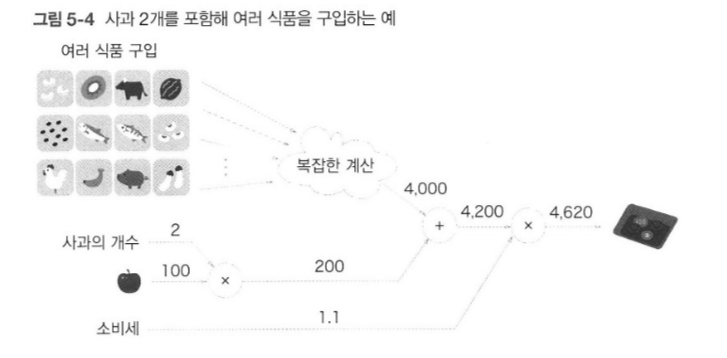

## 그래서, 왜 계산 그래프를 이용하는가?

- 1. 국소적 계산이 가능하다. 
    - 전체가 아무리 복잡한 구조로 이루어졌든, 각 노드에서는 단순한 계산만을 수행하게 됨. 따라서 문제가 단순해진다.
    
- 2. 중간 계산 결과를 모두 보관할 수 있다. 
    - 사과 2개까지 계산했을 때는 200원이라는 정보를 보관
    
- **3. 역전파를 통해 미분을 효율적으로 계산할 수 있다.** 

### 역전파를 통해 미분을 계산한다는 것의 의미

문제 1에서 사과 가격이 오르면 최종 금액에 어떤 영향을 미치는지 알고 싶다고 가정 
> 사과 가격에 대한 지불 금액의 미분을 구하는 문제에 해당한다.

사과 값을 $x$, 지불 금액을 $L$이라고 했을 때 $\dfrac{\partial{L}}{\partial{x}}$을 구하는 것과 동일한 문제가 된다.
> 사과 값이 '아주 조금' 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시한 것이다. 

'사과 가격에 대한 지불 금액의 미분'값은 계산 그래프에서 역전파를 수행하면 구할 수 있다.

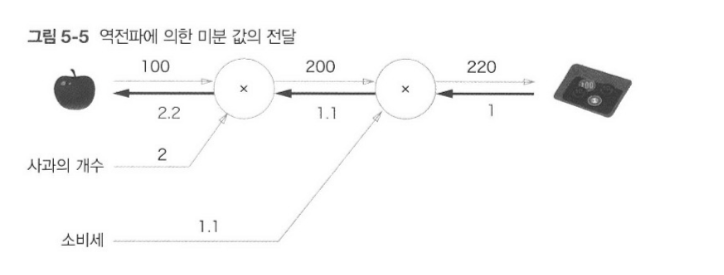

역전파는 오른쪽에서 왼쪽으로 '1$\rightarrow{}$1.1$\rightarrow{}$2.2'순으로 미분 값을 전달한다.

즉, 사과 가격에 대한 지불 금액의 미분은 2.2라고 할 수 있다.

# 연쇄법칙

순전파는 왼쪽에서 오른쪽으로 진행되지만, 역전파는 오른쪽에서 왼쪽으로 진행된다. 

이 국소적 미분을 전달하는 원리는 **연쇄법칙**에 의한 것이다. 

## 계산 그래프의 역전파

$y=f(x)$의 역전파를 계산 그래프로 표시

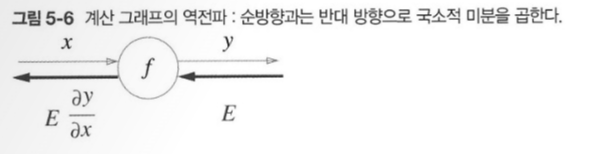

역전파의 계산 절차는 신호 $E$에 노드의 국소적 미분($\dfrac{\partial{y}}{\partial{x}}$)을 곱한 후 다음 노드로 전달하는 것이다. 

여기서 국소적 미분은 순전파 때의 $y=f(x)$ 계산의 미분을 구한다는 것이며, 이는 $x$에 대한 $y$의 미분($\dfrac{\partial{y}}{\partial{x}}$)을 구한다는 것이다. 

$y = f(x) = x^2$라면 $\dfrac{\partial{y}}{\partial{x}}=2x$가 된다. 

그리고 이 국소적 미분을 상류에서 전달된 값(여기서는 $E$)에 곱해 앞쪽 노드로 전달하는 것이다. 

## 연쇄법칙이란?

**합성 함수**를 고려

$z=(x+y)^2$는 다음의 두 개의 식으로 구성된다. 

$$z=t^2$$\
$$t=x+y$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=2 t \cdot 1=2(x+y)
$$

## 연쇄법칙과 계산 그래프

위의 마지막 식의 연쇄법칙 계산을 그래프로 표현 

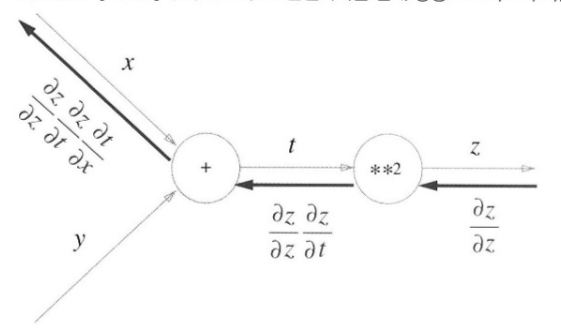

계산 그래프의 역전파는 오른쪽에서 왼쪽으로 신호를 전달한다. 

역전파의 계산 절차에서는 노드로 들어온 입력 신호에 그 노드의 편미분을 곱한 후 다음 노드로 전달한다. 

가장 왼쪽 역전파를 보면, 

$$
\frac{\partial z}{\partial z} \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=\frac{\partial z}{\partial x}
$$
가 성립되어 $z$에 대한 $x$의 미분이 된다.

# 역전파
- 앞에서는 계산 그래프의 역전파가 연쇄법칙에 따라 진행되는 모습을 학습
- 이번 절에서 '+'와 '$\times$' 등의 연산을 예로 들어 역전파의 구조를 설명

## 덧셈 노드의 역전파

$z=x+y$의 예로 살펴보기

$z=x+y$의 미분은 다음과 같이 해석적으로 계산할 수 있다.

$$
\frac{\partial z}{\partial x} = 1 
$$

$$
\frac{\partial z}{\partial y} = 1 
$$

계산 그래프로 표현하면 다음과 같다.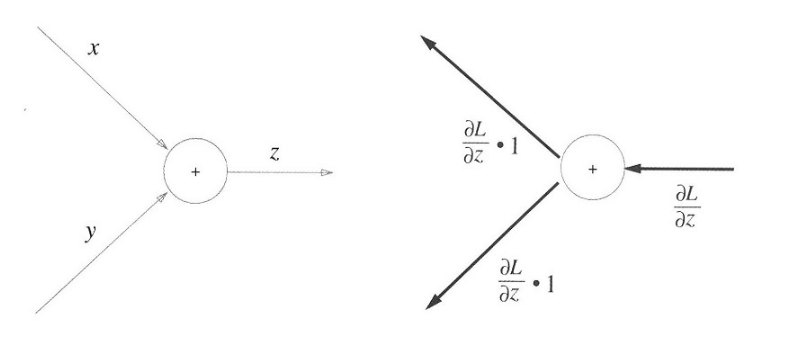

역전파 때는 상류에서 전해진 미분($\frac{\partial L}{\partial z} $)에 1을 곱해 하류로 흘린다.

즉, 덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력된 값을 그대로 다음 노드로 보낸다.

상류에서 전해진 미분 값을 $\frac{\partial L}{\partial z} $이라 했는데, 이는 최종적으로 $L$이라는 값을 출력하는 큰 계산 그래프를 가정했기 때문이다.

$z= x+y$도 그 큰 계산 그래프 중간 어딘가에 존재하는 것이고, 상류로부터 $\frac{\partial L}{\partial z}$를 전달받은 것 뿐이다. 

그리고 다시 하류로 $\frac{\partial L}{\partial x}$, $\frac{\partial L}{\partial y}$를 전달한다.

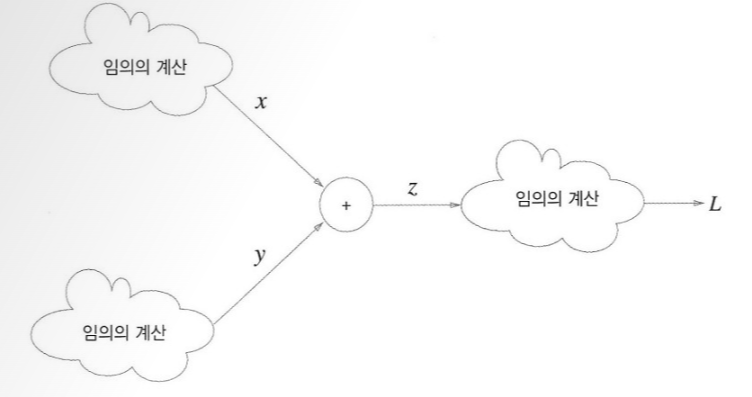

덧셈 노드 역전파의 구체적인 예
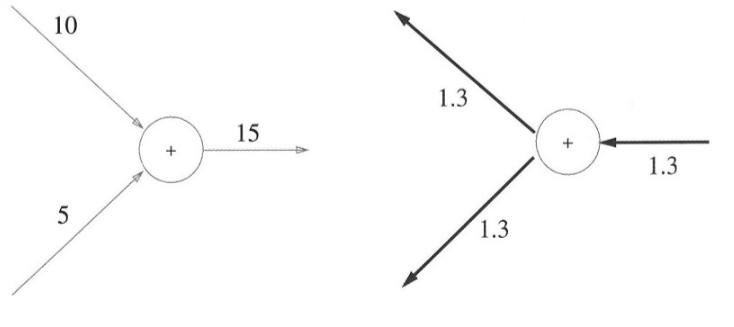

## 곱셈 노드의 역전파

$z=xy$의 예로 살펴보기

$z=xy$의 미분은 다음과 같이 해석적으로 계산할 수 있다.

$$
\frac{\partial z}{\partial x} = y
$$

$$
\frac{\partial z}{\partial y} = x
$$

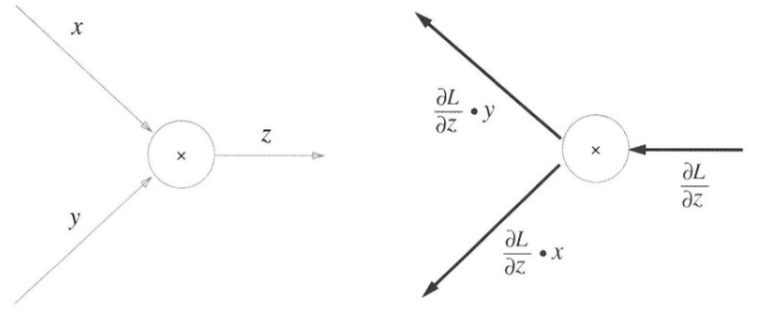

곱셈 노드 역전파는 상류의 값에 입력 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다. 

$10 \times 5 = 50$이라는 식이 있고 역전파 때 상류에서 1.3이라는 값이 흘러온다고 가정하면 다음과 같이 표현할 수 있다.

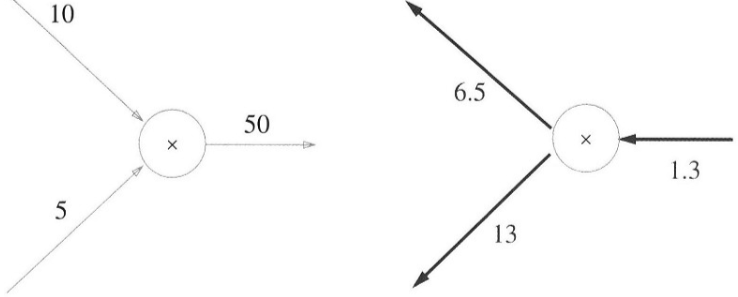

곱셈의 역전파에서는 입력 신호를 바꾼 값을 곱하여 하나는 $1.3 \times 5 = 6.5$, 다른 하나는 $1.3 \times 10 = 13$이 된다. 

덧셈의 역전파에서는 상류의 값을 그대로 흘려보내서 순방향 입력 신호가 필요없지만, 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 

그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다.

## 사과 쇼핑의 예

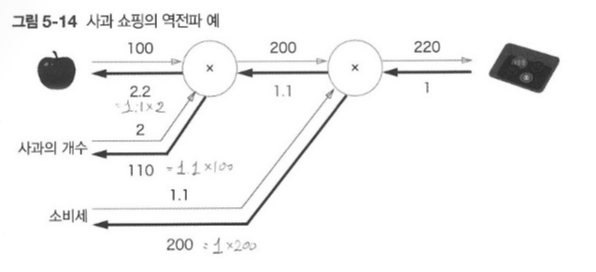

# 단순한 계층 구현하기

이번 절에서는 사과 쇼핑 예를 파이썬으로 구현
- 곱셈 노드를 **MulLayer**
- 덧셈 노드를 **AddLayer**

이라는 이름으로 구현

## 곱셈 계층

모든 계층은 forward()와 backward()라는 공통의 메서드를 갖도록 구현한다.
- forward() : 순전파
- backward() : 역전파



In [71]:
class MulLayer : 
    def __init__(self) : 
        self.x = None 
        self.y = None 
        
    def forward(self, x, y) :
        self.x = x 
        self.y = y 
        out = x * y
        
        return out 
    
    def backward(self, dout) : 
        dx = dout * self.y 
        dy = dout * self.x 
        
        return dx, dy       
        

`__init__()`에서는 인스턴스 변수인 x, y를 초기화한다. 이 두 변수는 순전파 시의 입력값을 유지하기 위해 사용한다. 

`forward()`에서는 두 변수를 인수로 받고 두 값을 곱해서 반환한다. 

반면 `backward()`에서는 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘린다. 

**MulLayer를 사용해서 사과 쇼핑을 구현**

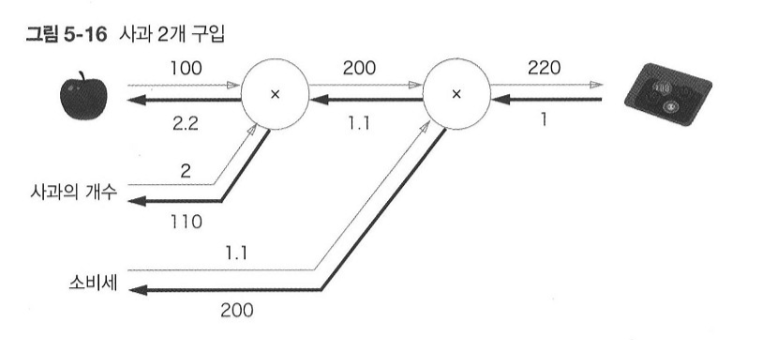

In [72]:
apple = 100 
apple_num = 2 
tax = 1.1 

# 계층 
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


각 변수에 대한 미분은 backward()에서 구할 수 있다.

In [73]:
# 역전파
dprice = 1 
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


## 덧셈 계층 

In [74]:
class AddLayer : 
    def __init__(self) : 
        pass 
        
    def forward(self, x, y) : 
        out = x + y
        
        return out 
    
    def backward(self, dout) : 
        dx = dout
        dy = dout 
        return dx, dy 

덧셈 계층에서는 초기화가 필요없기 때문에 `__init__()` 에서는 아무 일도 하지 않는다.

**덧셈 계층과 곱셈 계층을 사용하여 사과 2개와 귤 3개를 사는 상황을 구현**

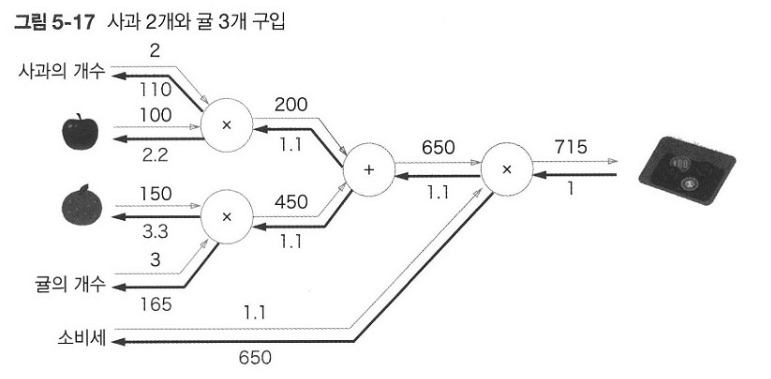

In [75]:
from layer_naive import *

apple = 100
apple_num = 2
orange = 150
orange_num = 3 
tax = 1.1 

# layers 
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파 
dprice = 1 
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

print(f'price : {price}')
print(f'dapple_num : {dapple_num}')
print(f'dapple : {dapple}')
print(f'dorange_num : {dorange_num}')
print(f'dorange : {dorange}')
print(f'dtax : {dtax}')


price : 715.0000000000001
dapple_num : 110.00000000000001
dapple : 2.2
dorange_num : 165.0
dorange : 3.3000000000000003
dtax : 650


# 활성화 함수 계층 구현하기

계산 그래프를 신경망에 적용 
> 신경망을 구성하는 계층 각각을 클래스 하나로 구현

활성화 함수인 ReLU, Sigmoid 계층을 구현 

## ReLU 계층

$$
y= \begin{cases}x & (x>0) \\ 0 & (x \leq 0)\end{cases}
$$

x에 대한 y의 미분은 다음과 같다.

$$
\frac{\partial y}{\partial x}= \begin{cases}1 & (x>0) \\ 0 & (x \leq 0)\end{cases}
$$


순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘리지만, 순전파 때 x가 0보다 작으면 하류로 신호를 보내지 않는다. 

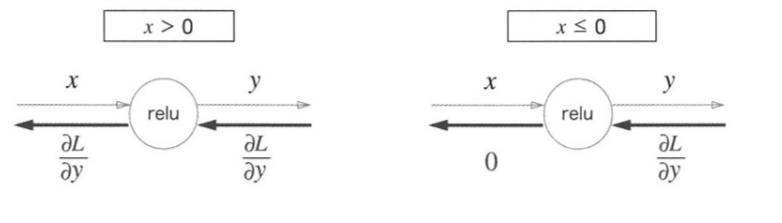

In [76]:
class Relu : 
    def __init__(self) : 
        self.mask = None 
        
    def forward(self, x) : 
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out 
    
    def backward(self, dout) : 
        dout[self.mask] = 0
        dx = dout 
        
        return dx

mask라는 인스턴스 변수를 가진다. mask는 True/False로 구성된 넘파이 배열로 순전파의 입력이 0이하인 인덱스는 True, 그 외의 인덱스는 False를 가진다.

In [77]:
import numpy as np 

In [78]:
# mask 예시
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


## SIgmoid

시그모이드 함수는 다음 식을 의미하는 함수이다. 

$$
y=\frac{1}{1+\exp (-x)}
$$

계산 그래프로 표현하면 다음과 같다.

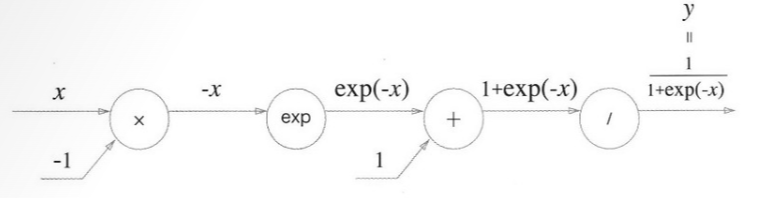

### step 1

'/' 노드, 즉 $y=\dfrac{1}{x}$를 미분하면 다음과 같다.

$$
\begin{aligned}
\frac{\partial y}{\partial x} &=-\frac{1}{x^{2}} \\
&=-y^{2}
\end{aligned}
$$


따라서 역전파 때는 상류에서 흘러온 값에 $-y^2$(순전파의 출력을 제곱한 후 마이너스를 붙인 값)을 곱해서 하류로 전달한다.

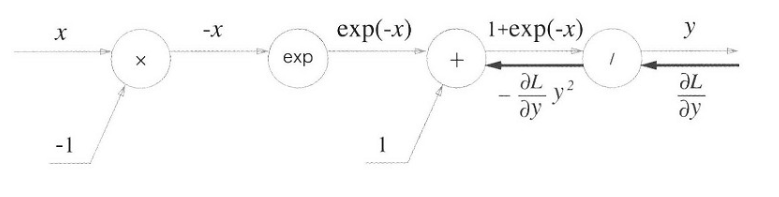

### step 2

'+' 노드는 상류의 값을 여과없이 하류로 보낸다. 

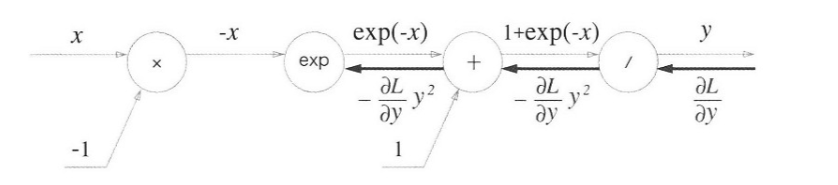

### step 3

'exp' 노드는 $y = exp(x)$연산을 수행하며 그 미분은 다음과 같다.

$$
\dfrac{\partial{y}}{\partial{x}}=\exp(x)
$$

계산 그래프에서는 상류의 값에 순전파 때의 출력(여기서는 $exp(-x)$)를 곱해 하류로 전파

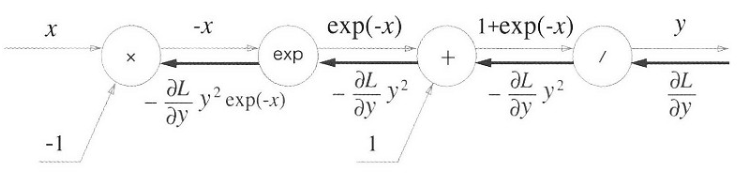

### step 4

'$\times$'노드는 순전파 때의 값을 서로 바꿔 곱한다. 여기서는 -1을 곱하면 된다.

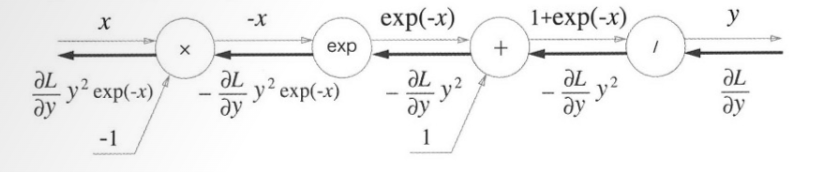

위의 과정을 간소화하면 다음과 같다.

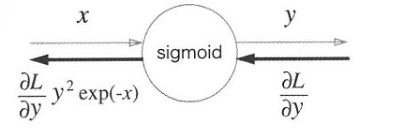

또한, $\frac{\partial L}{\partial y} y^{2} \exp (-x)$ 는 다음과 같이 정리해서 쓸 수 있다.
$$
\begin{aligned}
\frac{\partial L}{\partial y} y^{2} \exp (-x) &=\frac{\partial L}{\partial y} \frac{1}{(1+\exp (-x))^{2}} \exp (-x) \\
&=\frac{\partial L}{\partial y} \frac{1}{1+\exp (-x)} \frac{\exp (-x)}{1+\exp (-x)} \\
&=\frac{\partial L}{\partial y} y(1-y)
\end{aligned}
$$


이처럼 Sigmoid 계층의 역전파는 순전파의 출력만으로 계산할 수 있다.

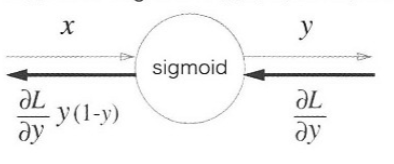

In [79]:
class Sigmoid : 
    def __init__(self) : 
        self.out = None 
        
    def forward(self, x) : 
        out = 1 / (1 + np.exp(-x))
        self.out = out 
        
        return out 
    
    def backward(self, dout) : 
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

이 구현에서는 순전파의 출력을 인스턴스 변수 out에 보관했다가 역전파 계산 때 그 값을 사용 

# Affine/Sortmax 계층 구현하기

## Affine 계층 
신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 곱을 사용했다. 

행렬의 곱 계산에서는 대응하는 차원의 원소 수를 일치시키는 것이 핵심이다. 

> 신경망의 순전파 때 사용하는 행렬의 곱은 기하학에서는 어파인 변환(Affine transformation)이라고 한다. 

그래서 어파인 변환을 수행하는 처리를 어파인 변환이라는 이름으로 구현 

np.dot(X, W) + B 계산은 다음과 같이 표현될 수 있다.

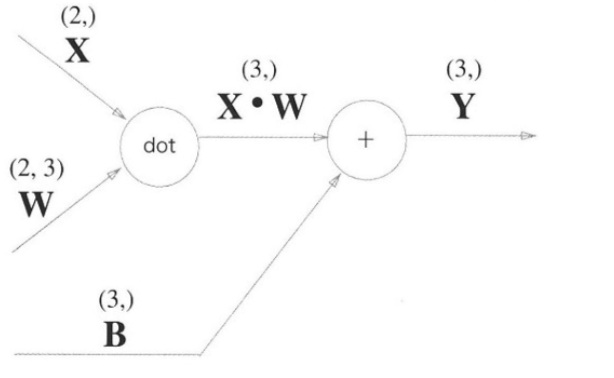

지금까지는 노드 사이에 스칼라값이 흘렀던 것에 반해 여기서는 행렬이 흐른다. 

$$
\begin{aligned}
&\frac{\partial L}{\partial \mathbf{X}}=\frac{\partial L}{\partial \mathbf{Y}} \cdot \mathbf{W}^{\mathrm{T}} \\
&\frac{\partial L}{\partial \mathbf{W}}=\mathbf{X}^{\mathrm{T}} \cdot \frac{\partial L}{\partial \mathbf{Y}}
\end{aligned}
$$


계산 그래프의 역전파를 구해보면 다음과 같다.

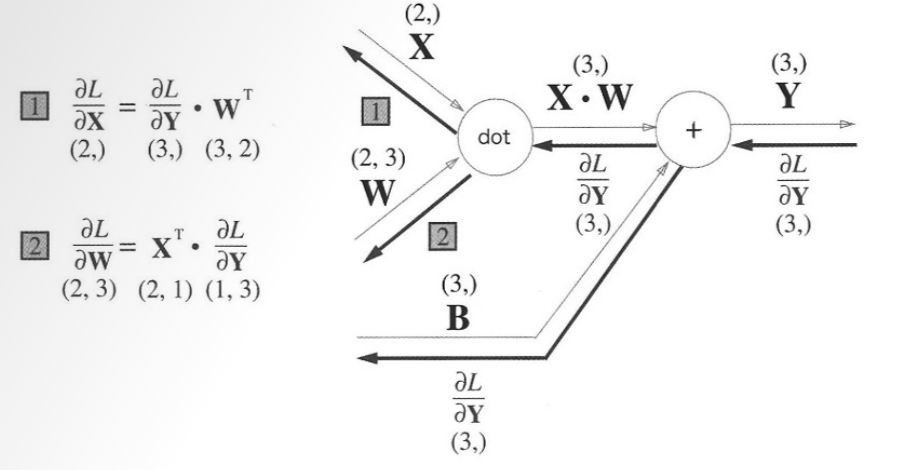

## 배치용 Affine 계층

위의 과정은 입력 데이터로 $X$하나만을 고려한 것이었다. 이번 절에서는 데이터 $N$개를 묶어 순전파를 수행하는 경우(즉, 배치용 Affine 계층)를 고려

배치용 Affine 계층을 계산 그래프로 그려보면 다음과 같다.

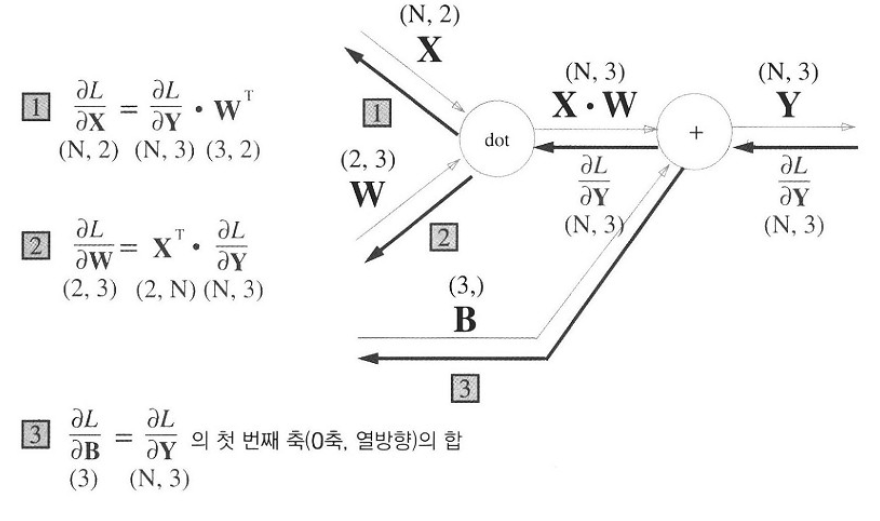

In [80]:
class Affine : 
    def __init__(self, W, b) : 
        self.W = W 
        self.b = b 
        self.x = None 
        self.dW = None 
        self.db = None 
        
    def forward(self, x) : 
        self.x = x 
        out = np.dot(x, self.W) + self.b 
        
        return out 
    
    def backward(self, dout) : 
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx 

## Softmax-with-Loss 계층

출력층에서 사용하는 소프트맥스 함수
- 소프트맥스 함수는 입력값을 정규화하여 출력한다.
- MNIST에서 softmax 계층의 출력

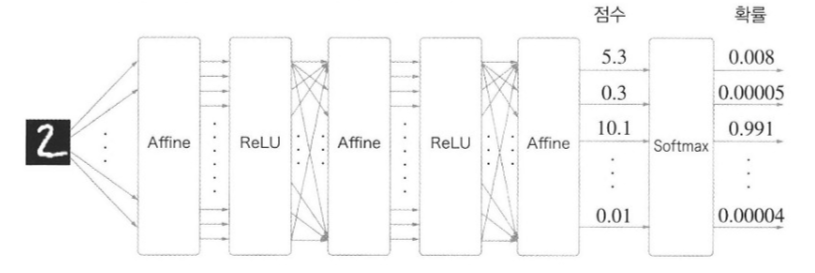

이 문제에서는 경우의 수가 10개이기 때문에 softmax 계층의 입력은 10개가 된다.

소프트맥스 계층을 구현하는데, 손실 함수인 교차 엔트로피 오차도 포함하여 'Softmax-with-Loss 계층'이라는 이름으로 구현한다.

계산 그래프를 먼저 살펴보면 다음과 같다.

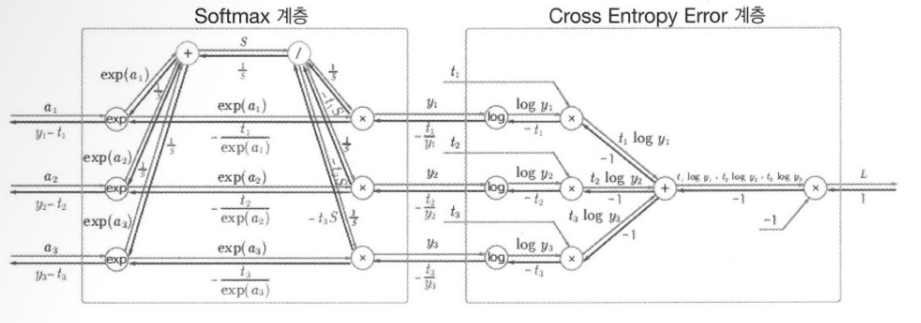

위의 계산 그래프는 아래와 같이 간소화할 수 있다.

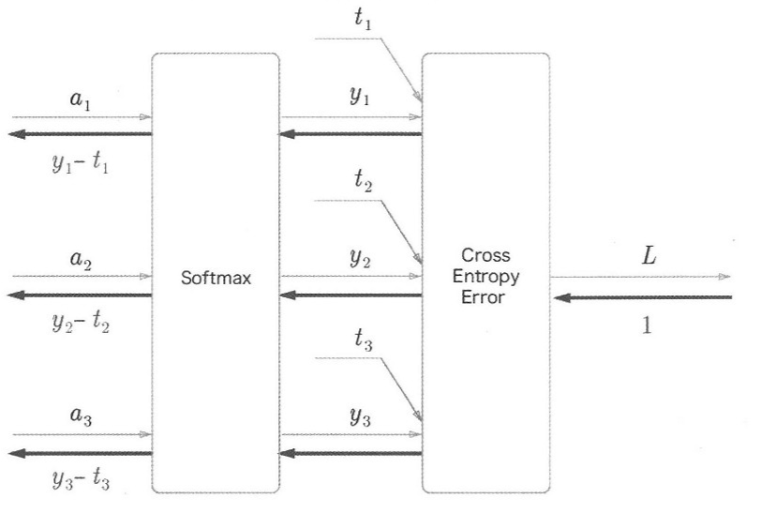

여기서는 3클래스 분류를 가정하고 이전 계층에서 3개의 입력(점수)를 받는다. 그림과 같이 softmax 계층은 입력 ($a_1, a_2, a_3$)를 정규화하여 ($y_1, y_2, y_3$)을 출력한다. 

CrossEntropy 계층에서 softmax의 출력($y_1, y_2, y_3$)과 정답 레이블($t_1, t_2, t_3$)을 받고 이 데이터로부터 손실 $L$을 계산한다.

**여기서 주목할 점은 역전파의 결과이다.**

softmax 계층의 역전파는 ($y_1-t_1, y_2-t_2, y_3-t_3$)이라는 깔끔한 결과를 내놓는다. (단순히 softmax 계층의 출력과 정답 레이블의 차분이다.)

신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것이다. 이는 신경망 학습의 중요한 성질이 된다. 

그런데, 신경망 학습의 목적은 신경망의 출력이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이다. 

그래서 신경망의 출력과 정답 레이블의 오차를 효율적으로 앞 계층에 전달해야 한다. 

앞의 ($y_1-t_1, y_2-t_2, y_3-t_3$)라는 결과는 바로 softmax계층의 출력과 정답 레이블의 차이로, 신경망의 현재 출력과 정답 레이블의 오차를 나타낸다.

### 예시

정답 레이블이 (0,1,0)일 때, softmax 계층이 (0.3, 0.2, 0.5)를 출력했다고 가정하자.

이 때 정답의 인덱스는 1이다. 그런데 출력에서는 이 때의 확률이 0.2밖에 되지 않아서 제대로 인식하지 못하고 있다고 볼 수 있다.

이 경우 softmax 계층의 역전파는 (0.3, -0.8, 0.5)라는 커다란 오차를 전파한다.
> 결과적으로 앞 계층에서는 그 큰 오차로부터 큰 깨달음을 얻게 된다.(예측이 틀렸다는 사실)

똑같이 정답 레이블이 (0,1,0)일 때, softmax 계층이 (0.01, 0.99, 0)을 출력했다고 가정하자.

이 경우 softmax 계층의 역전파는 (0.01, -0.01, 0)이라는 비교적 작은 오차를 전파한다.
> 결과적으로 앞 계층에서는 오차가 작기 때문에 학습하는 정도도 작아진다.

**Softmax-with-Loss 구현**

In [81]:
class SoftmaxWithLoss : 
    def __init__(self) : 
        self.loss = None 
        self.y = None 
        self.t = None 
        
    def forward(self, x, t) : 
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout = 1) : 
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

# 오차역전파법 구현

## 전체 그림 

0. 전제 
> 신경망에는 적응 가능한 가중치와 편향이 있고, 이 값들을 훈련 데이터에 적응하도록 조정하는 과정을 **학습**이라고 한다. 신경망 학습은 아래의 4단계를 수행한다.

1. 미니배치
> 훈련 데이터 중 일부를 무작위로 가져온다. 이것을 미니배치라고 하며, 그 미니배치의 손실값을 줄이는 것이 목표이다.

2. 기울기 산출
> 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 계산한다. 기울기는 손실 함수의 값을 작게하는 방향을 제시한다.

3. 매개변수 갱신
> 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4. 반복
> 1~3을 반복


## 오차역전파법을 이용한 신경망 구현 

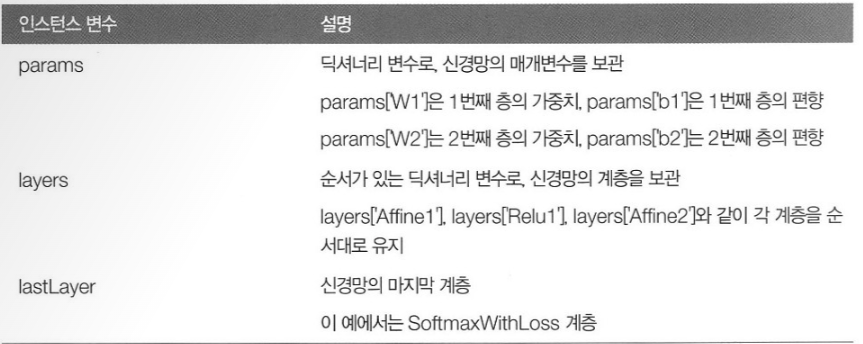

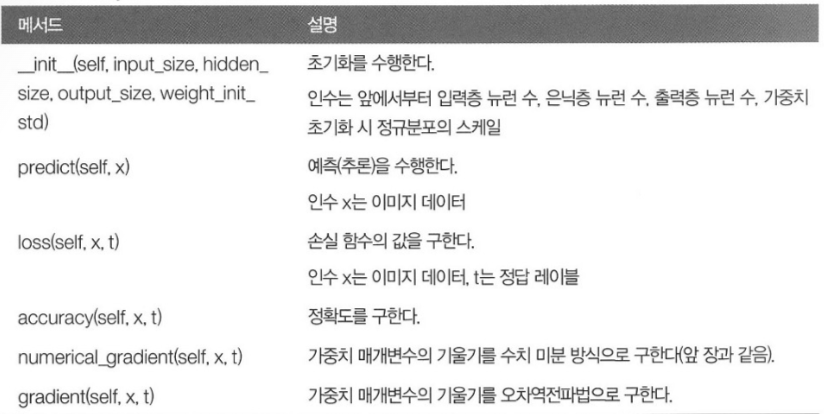

In [82]:
import os, sys 
sys.path.append(os.pardir)
import numpy as np 

from common.layers import * 
from common.gradient import numerical_gradient 
from collections import OrderedDict

class TwoLayerNet : 
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01) : 
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        
        # 계층 생성 
        self.layers = OrderedDict() # 딕셔너리에 추가한 순서를 기억 
        self.layers['Affine'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x) : 
        for layer in self.layers.values() : 
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t) : 
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t) : 
        y = self.predict(x)
        y = np.argmax(y, axis = 1) 
        if t.ndim != 1 : 
            t = np.argmax(t, axis = 1) 
            
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy 
    
    def numerical_gradient(self, x, t) : 
        loss_W = lambda W : self.loss(x, t) 
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads 
    
    def gradient(self, x, t) : 
        # 순전파
        self.loss(x, t) 
        
        # 역전파
        dout = 1 
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers : 
            dout = layers.backward(dout)
            
        # 결과 저장 
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine2'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

## 오차역전파법으로 구한 기울기 검증하기

수치 미분의 결과와 오차역전파법의 기울기를 비교하여 두 기울기가 일치(엄밀히 말하면, 거의 같음)하는지 확인하는 작업을 **기울기 확인**이라고 한다.

In [84]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist 
from ch05.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후 평균 계산 
for key in grad_numerical.keys() :
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(f'{key} : {str(diff)}')

W1 : 5.097385379400354e-10
b1 : 2.8683645995680393e-09
W2 : 5.944020306815551e-09
b2 : 1.4042498020921946e-07


오차가 0에 가깝기 때문에, 제대로 구현한 것을 알 수 있다.

## 오차역전파법을 사용한 학습 구현 

In [88]:
from tqdm import tqdm

In [89]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print('train-acc ----- test-acc')
for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

train-acc ----- test-acc


  0%|          | 42/10000 [00:00<01:09, 143.40it/s]

0.09891666666666667 0.0981


  7%|▋         | 665/10000 [00:01<00:30, 309.75it/s]

0.9044 0.9093


 13%|█▎        | 1281/10000 [00:03<00:28, 307.17it/s]

0.9222166666666667 0.9234


 18%|█▊        | 1850/10000 [00:05<00:25, 318.55it/s]

0.9342833333333334 0.9334


 24%|██▍       | 2438/10000 [00:06<00:27, 279.12it/s]

0.94515 0.9437


 31%|███       | 3052/10000 [00:07<00:18, 384.02it/s]

0.9524333333333334 0.9492


 37%|███▋      | 3675/10000 [00:09<00:18, 337.64it/s]

0.9570166666666666 0.9534


 43%|████▎     | 4284/10000 [00:10<00:15, 380.16it/s]

0.9627 0.9577


 49%|████▉     | 4881/10000 [00:12<00:12, 402.62it/s]

0.9660666666666666 0.9614


 55%|█████▍    | 5456/10000 [00:13<00:11, 410.16it/s]

0.9680333333333333 0.964


 61%|██████    | 6071/10000 [00:14<00:10, 357.36it/s]

0.9711333333333333 0.9649


 67%|██████▋   | 6681/10000 [00:15<00:08, 376.57it/s]

0.97255 0.9662


 73%|███████▎  | 7252/10000 [00:16<00:07, 379.39it/s]

0.9746166666666667 0.9662


 78%|███████▊  | 7842/10000 [00:18<00:06, 355.21it/s]

0.977 0.968


 85%|████████▍ | 8461/10000 [00:19<00:03, 390.93it/s]

0.9770333333333333 0.9694


 90%|█████████ | 9049/10000 [00:20<00:02, 358.65it/s]

0.9777 0.969


 97%|█████████▋| 9681/10000 [00:22<00:00, 369.94it/s]

0.98025 0.969


100%|██████████| 10000/10000 [00:22<00:00, 441.60it/s]
